## LIBRA-seq Output Visualization

Basic exploratory analysis and UpSet plot generation using LIBRA-seq output files. Examples shown using dataset 7979

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib_venn as venn
import os

from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
print (date)

path = './'

2023-04-26


## Basic QC and filtering on outputs from Cell Ranger
* Samples are filtered separately, then concatenated for further analysis

In [2]:
order = ['U-mRNA', 'm1Ψ-mRNA', 'GPC', 'Empty LNP']
colordict = {'U-mRNA':'cornflowerblue', 'm1Ψ-mRNA':'red', 'GPC':'lightgreen', 'Empty LNP':'black'}

In [3]:
# I think it would be better to align each sample as I load it, then concatenate all of them.

def align_index(adata, vdj_df, plot, sample_tag):
    # Drop duplicated barcodes
    vdj_df = vdj_df.loc[vdj_df.index.drop_duplicates(keep=False)]

    # Add sample tags to avoid duplicated indices when concatenating samples
    vidx = [i + '-1-' + sample_tag for i in vdj_df.index]
    vdj_df.index = vidx

    aidx = adata.obs.index + '-' + sample_tag
    adata.obs.index = aidx 

    # Visualize overlap of barcodes
    if plot == True:
        venn.venn2([set(aidx), set(vidx)])
    
    # Get overlapping barcodes and subset objects
    overlap = (np.intersect1d(aidx, vidx))
    vdj_df= vdj_df.loc[overlap]
    adata = adata[overlap]

    adata.obs['Isotype'] = vdj_df['C_CALL.H']

    return adata, vdj_df


def load_sample(folder,tag, matrix_name):

    # Load in Cell Ranger outputs
    try:
        adata = sc.read_10x_mtx((path + folder + matrix_name))
    except:
        adata = sc.read_10x_h5((path + folder + matrix_name))
    
    adata.var_names_make_unique()
    vdj_output = pd.read_csv((path +folder + '/' + [f for f in os.listdir(path + folder) if 'paired' in (f)][0]), index_col=0)

    print(folder)
    print('adata shape:')
    print(adata.shape)
    print('vdj shape:')
    print(vdj_output.shape)

    # Call align function to get overlapping barcodes between VDJ and GEX sequencing
    adata, vdj_df = align_index(adata, vdj_output, sample_tag = tag, plot=False)

    return adata, vdj_df


Uridine

In [4]:
u1_adata, u1_vdj = load_sample('uridine1', 'u1', '/vaccine_ref5/filtered_feature_bc_matrix.h5')
u2_adata, u2_vdj = load_sample('uridine2', 'u2', '/vaccine_ref5/filtered_feature_bc_matrix.h5')
u3_adata, u3_vdj = load_sample('uridine3', 'u3', '/vaccine_ref5/filtered_feature_bc_matrix.h5')
u4_adata, u4_vdj = load_sample('uridine4', 'u4', '/vaccine_ref5/filtered_feature_bc_matrix.h5')

# Concatenate the samples
u_adata = sc.concat([u1_adata, u2_adata, u3_adata, u4_adata],label='Repeat', keys=['u1', 'u2','u3', 'u4',])
u_vdj = pd.concat([u1_vdj, u2_vdj, u3_vdj, u4_vdj])

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


uridine1
adata shape:
(3624, 32286)
vdj shape:
(2766, 62)


C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']
c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


uridine2
adata shape:
(5695, 32286)
vdj shape:
(4322, 62)


C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']
c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


uridine3
adata shape:
(6399, 32286)
vdj shape:
(5038, 62)


C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']
c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


uridine4
adata shape:
(5230, 32286)
vdj shape:
(3912, 62)


C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']


Pseudouridine

In [5]:
p1_adata, p1_vdj = load_sample('pseudo1', 'p1', '/vaccine_ref5/filtered_feature_bc_matrix.h5')
p2_adata, p2_vdj = load_sample('pseudo2', 'p2', '/vaccine_ref5/filtered_feature_bc_matrix.h5')
p3_adata, p3_vdj = load_sample('pseudo3', 'p3', '/vaccine_ref5/filtered_feature_bc_matrix.h5')
p4_adata, p4_vdj = load_sample('pseudo4', 'p4', '/vaccine_ref5/filtered_feature_bc_matrix.h5')

# Concatenate the samples, 
p_adata = sc.concat([p1_adata, p2_adata, p3_adata, p4_adata],label='Repeat', keys=['p1', 'p2','p3', 'p4',])
p_vdj = pd.concat([p1_vdj, p2_vdj, p3_vdj, p4_vdj])

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


pseudo1
adata shape:
(6167, 32286)
vdj shape:
(4493, 62)


C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']
c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


pseudo2
adata shape:
(6606, 32286)
vdj shape:
(4584, 62)


C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']
c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


pseudo3
adata shape:
(6561, 32286)
vdj shape:
(4397, 62)


C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']
c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


pseudo4
adata shape:
(7509, 32286)
vdj shape:
(4893, 62)


C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']


Empty Nano

In [6]:
n1_adata, n1_vdj = load_sample('nano1', 'n1', '/filtered_feature_bc_matrix.h5')
n2_adata, n2_vdj = load_sample('nano2', 'n2', '/filtered_feature_bc_matrix.h5')
n3_adata, n3_vdj = load_sample('nano3', 'n3', '/filtered_feature_bc_matrix.h5')
n4_adata, n4_vdj = load_sample('nano4', 'n4', '/filtered_feature_bc_matrix.h5')

# Concatenate the samples
n_adata = sc.concat([n1_adata, n2_adata, n3_adata, n4_adata],label='Repeat', keys=['n1', 'n2','n3', 'n4',])
n_vdj = pd.concat([n1_vdj, n2_vdj, n3_vdj, n4_vdj])

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']


nano1
adata shape:
(4754, 32285)
vdj shape:
(993, 62)


c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']


nano2
adata shape:
(3637, 32285)
vdj shape:
(611, 62)


c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']


nano3
adata shape:
(4754, 32285)
vdj shape:
(906, 62)
nano4
adata shape:
(6092, 32285)
vdj shape:
(1254, 62)


c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']


GPCAg

In [7]:
g1_adata, g1_vdj = load_sample('GPCAg-1', 'g1', '/filtered_feature_bc_matrix.h5')
g2_adata, g2_vdj = load_sample('GPCAg-2', 'g2', '/filtered_feature_bc_matrix.h5')
g3_adata, g3_vdj = load_sample('GPCAg-3', 'g3', '/filtered_feature_bc_matrix.h5')
g4_adata, g4_vdj = load_sample('GPCAg-4', 'g4', '/filtered_feature_bc_matrix.h5')

# Concatenate the samples
g_adata = sc.concat([g1_adata, g2_adata, g3_adata, g4_adata],label='Repeat', keys=['g1', 'g2','g3', 'g4',])
g_vdj = pd.concat([g1_vdj, g2_vdj, g3_vdj, g4_vdj])

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']


GPCAg-1
adata shape:
(2410, 32285)
vdj shape:
(1865, 62)


c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']


GPCAg-2
adata shape:
(4171, 32285)
vdj shape:
(3439, 62)


c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GPCAg-3
adata shape:
(4945, 32285)
vdj shape:
(3741, 62)


C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']
c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GPCAg-4
adata shape:
(4731, 32285)
vdj shape:
(3701, 62)


C:\Users\perry\AppData\Local\Temp\ipykernel_36808\3722978938.py:23: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Isotype'] = vdj_df['C_CALL.H']


In [8]:
udict = {'1':u1_adata.shape[0], '2':u2_adata.shape[0], '3':u3_adata.shape[0],'4':u4_adata.shape[0]}
udf = pd.DataFrame.from_dict(udict, orient='index')
udf['Sample'] = 'Uridine'

p_dict = {'1':p1_adata.shape[0], '2':p2_adata.shape[0], '3':p3_adata.shape[0],'4':p4_adata.shape[0]}
pdf = pd.DataFrame.from_dict(p_dict, orient='index')
pdf['Sample'] = 'Psuedouridine'

n_dict = {'1':n1_adata.shape[0], '2':n2_adata.shape[0], '3':n3_adata.shape[0],'4':n4_adata.shape[0]}
ndf = pd.DataFrame.from_dict(n_dict, orient='index')
ndf['Sample'] = 'Empty Nano'

g_dict = {'1':g1_adata.shape[0], '2':g2_adata.shape[0], '3':g3_adata.shape[0],'4':g4_adata.shape[0]}
gdf = pd.DataFrame.from_dict(g_dict, orient='index')
gdf['Sample'] = 'GPCAg'

In [9]:
plot_df = pd.concat([udf, pdf, ndf, gdf])
plot_df = plot_df.pivot(columns='Sample')
plot_df = plot_df.T
plot_df.index = plot_df.index.droplevel(0)

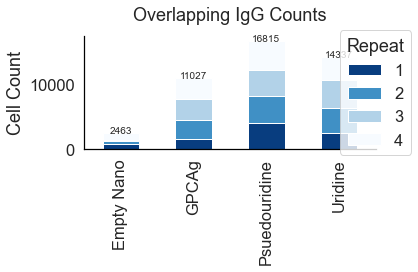

In [10]:
import matplotlib as mpl
cmap = mpl.cm.Blues_r(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[1:,:5])

sns.set(rc = {'figure.figsize':(8,7),  'axes.edgecolor': 'black', 'axes.spines.right': False,
          'axes.spines.top': False, 'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale = 1.5)
# sns.set_palette('deep')
ax = plot_df.plot(kind='bar', stacked=True, colormap=cmap)
ax.set_ylabel('Cell Count')
ax.set_xlabel('')
for x, y in enumerate(plot_df.sum(axis=1)):
    ax.annotate(y, (x, y), ha='center')

plt.legend(loc="right", bbox_to_anchor=(1.15 ,0.5), ncol= 1, title='Repeat')
plt.title('Overlapping IgG Counts', y=1.08)
plt.tight_layout()
# plt.savefig('RNA_counts_barplot.svg')


### All adatas

In [11]:
vdj_dfs = [p_vdj,  u_vdj, g_vdj, n_vdj] 
vdj_df = pd.concat(vdj_dfs)

### Integration by treatment group

In [12]:
adatas = [u_adata, p_adata, g_adata, n_adata]

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


<Figure size 432x288 with 0 Axes>

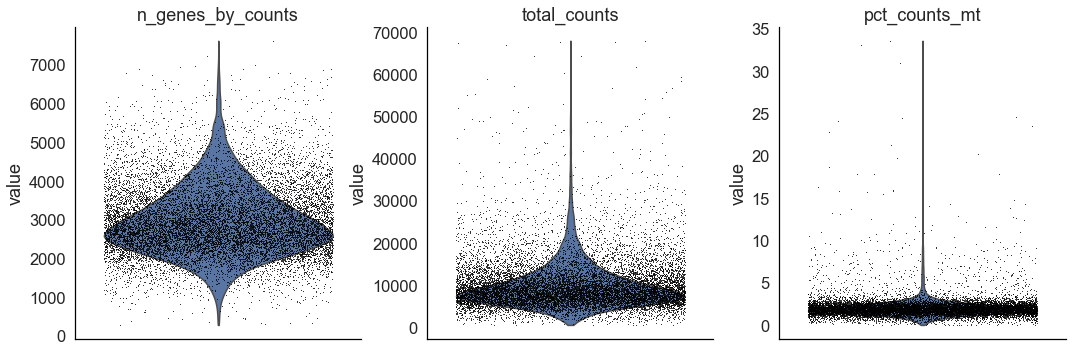

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


<Figure size 432x288 with 0 Axes>

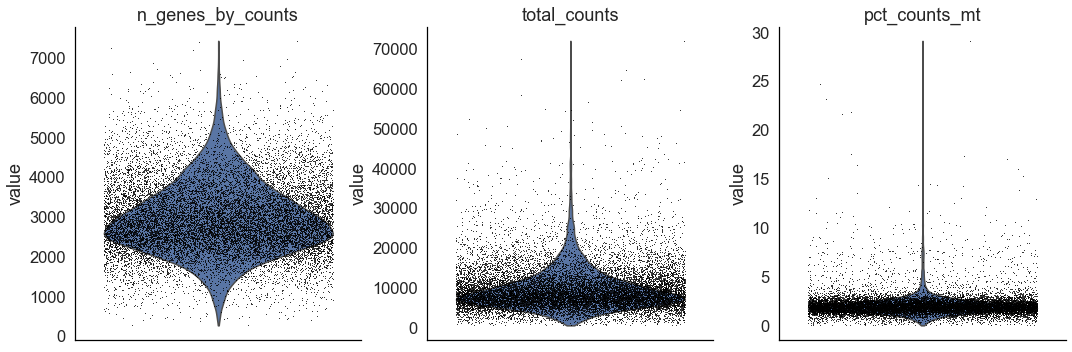

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


<Figure size 432x288 with 0 Axes>

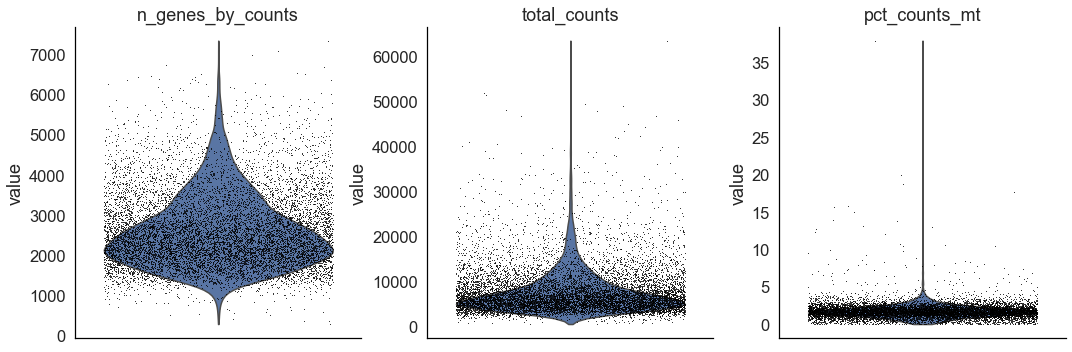

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


<Figure size 432x288 with 0 Axes>

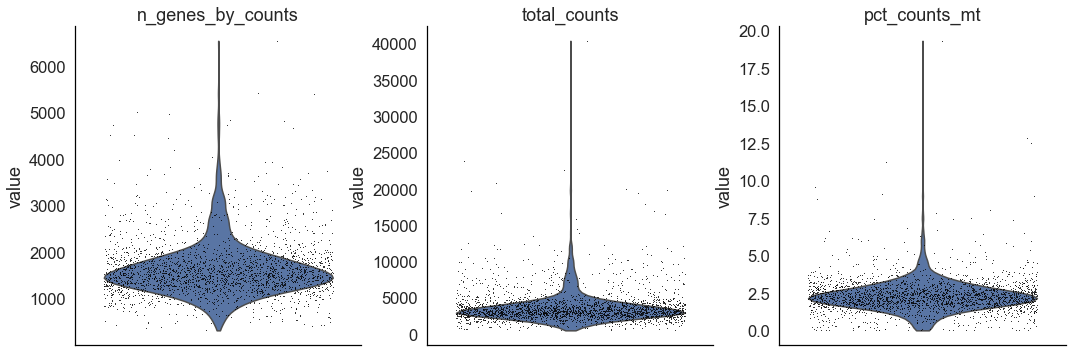

In [13]:
for i in range(len(adatas)):
    plt.figure()
    ad = adatas[i]

    ad.var_names = [i.upper() for i in (ad.var_names.values)]

    ad.raw = ad
    non_IG_genes_list = [name for name in ad.var_names if not (name.startswith('IGH') or name.startswith('IGK') or name.startswith('IGL'))]
    ad = ad[:, non_IG_genes_list]
    sc.pp.filter_genes(ad, min_cells=3)
    ad.var['mt'] = ad.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(ad, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    sc.pl.violin(ad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

    ad = ad[ad.obs.n_genes_by_counts < 5000, :]
    ad = ad[ad.obs.pct_counts_mt < 5, :]

    ad.layers['counts'] = ad.X

    sc.pp.normalize_total(ad, target_sum=1e4)
    sc.pp.log1p(ad)

    adatas[i] = ad

In [16]:
names = ['U-mRNA','m1Ψ-mRNA', 'GPC', 'Empty LNP']

In [17]:
concat_adata = sc.concat(adatas, label='Sample', keys=names) # ,'GPCAg', 'Nano',
concat_adata.var_names = [i.upper() for i in (concat_adata.var_names.values)]

In [18]:
concat_adata

AnnData object with n_obs × n_vars = 42810 × 13557
    obs: 'Isotype', 'Repeat', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    layers: 'counts'

In [19]:
vdj_df = vdj_df.loc[vdj_df.index.drop_duplicates(keep=False)]
concat_adata = concat_adata[concat_adata.obs.index.drop_duplicates(keep=False)]
overlap = (np.intersect1d(concat_adata.obs.index, vdj_df.index))
concat_adata = concat_adata[overlap]
vdj_df = vdj_df.loc[overlap]

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


<Figure size 432x288 with 0 Axes>

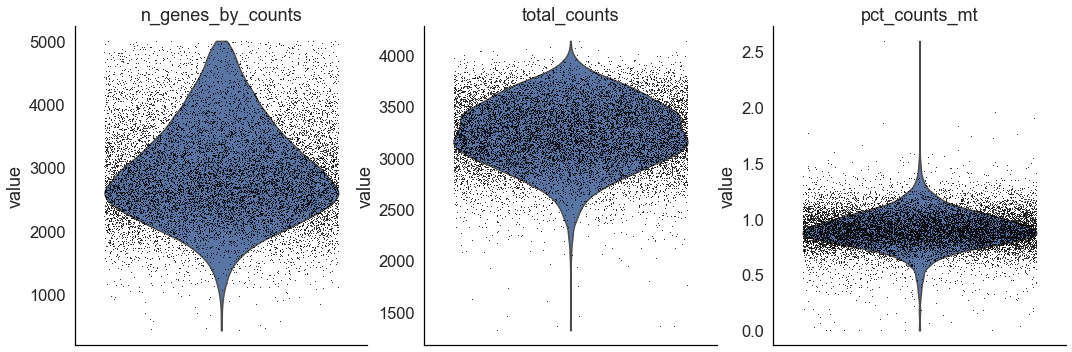

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


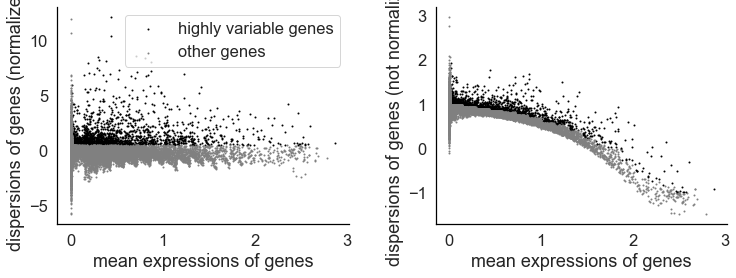

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


<Figure size 432x288 with 0 Axes>

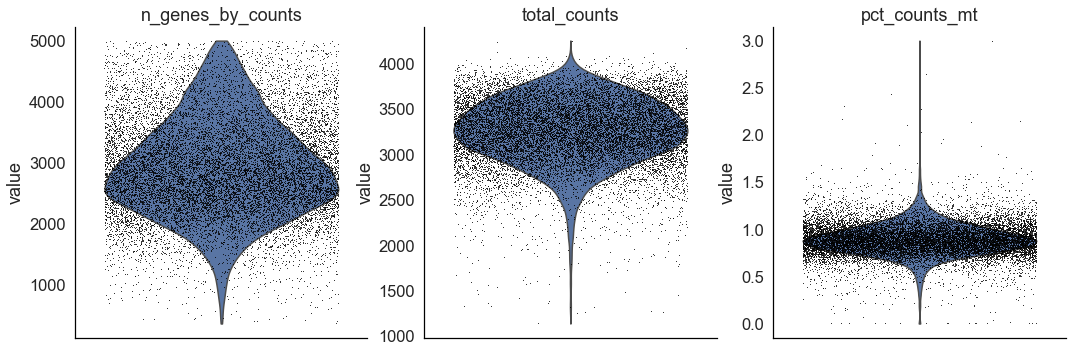

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


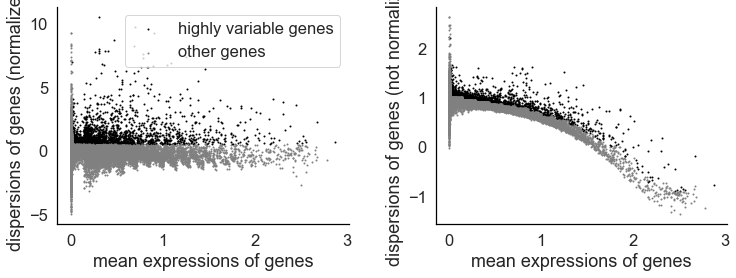

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


<Figure size 432x288 with 0 Axes>

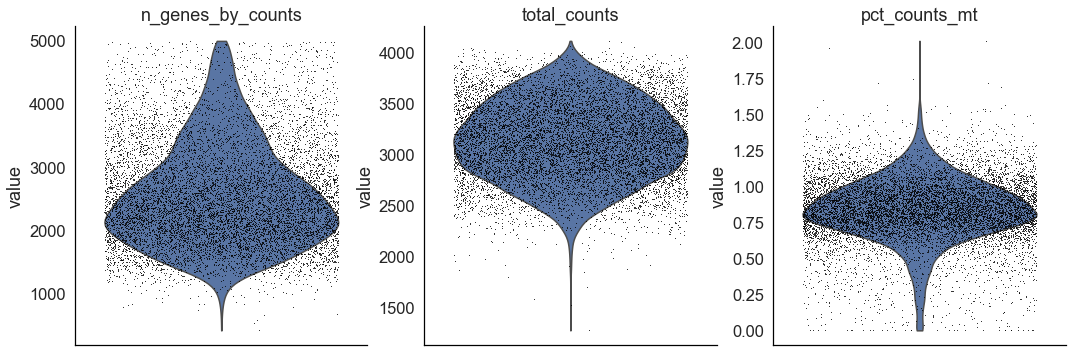

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


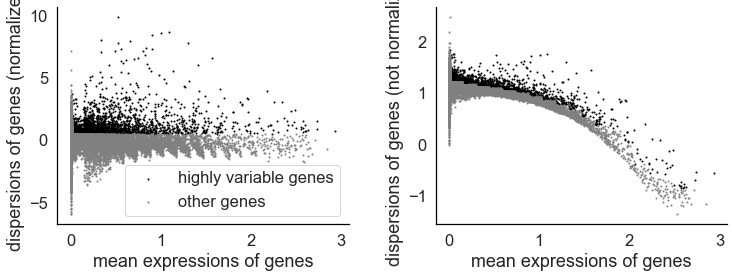

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


<Figure size 432x288 with 0 Axes>

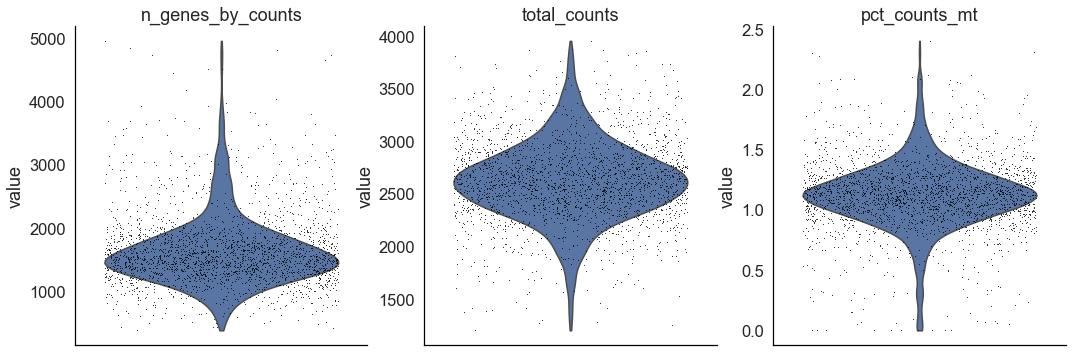

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


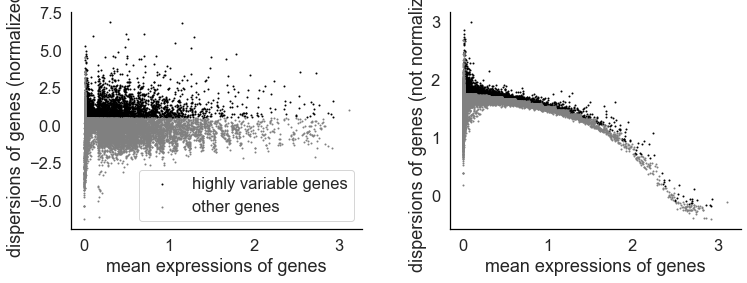

In [22]:
hvg_dict = {}
for i in range(len(adatas)):
    adata = adatas[i].copy()
    plt.figure()
    adata.var_names = [i.upper() for i in (adata.var_names.values)]
    non_IG_genes_list = [name for name in adata.var_names if not (name.startswith('IGH') or name.startswith('IGK') or name.startswith('IGL'))]
    adata = adata[:, non_IG_genes_list]
    sc.pp.filter_genes(adata, min_cells=1)
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

    adata = adata[adata.obs.n_genes_by_counts < 5000, :]
    adata = adata[adata.obs.pct_counts_mt < 5, :]

    adatas[i] = adata.copy()

    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    sc.pl.highly_variable_genes(adata)

    hvg_dict[i] = adata.var.highly_variable

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


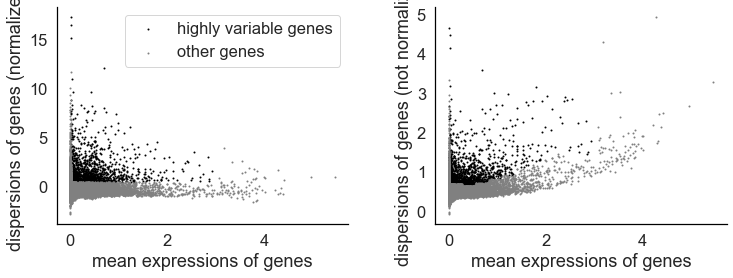

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [23]:
sc.pp.highly_variable_genes(concat_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(concat_adata)

concat_adata = concat_adata[:, concat_adata.var.highly_variable]
sc.pp.scale(concat_adata, max_value=10)

### Figure S4B

In [25]:
sc.tl.pca(concat_adata, svd_solver='arpack')

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


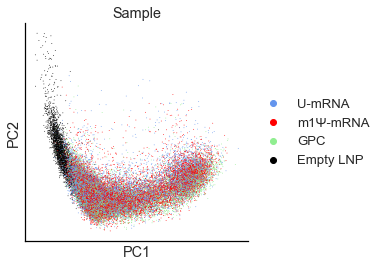

In [29]:
concat_adata.obs.Sample = concat_adata.obs.Sample.replace({'Empty LNP':'Empty LNP'})

sns.set(rc = {'figure.figsize':(4,4),  'axes.edgecolor': 'black', 'axes.spines.right': False,
          'axes.spines.top': False, 'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale = 1.2)

sc.pl.pca(concat_adata, color=['Sample'], palette = colordict) #  , save='_sample_23-03-03.svg')

In [30]:
sc.pp.neighbors(concat_adata, n_neighbors=20, n_pcs=30, random_state=12)
sc.tl.umap(concat_adata, random_state=42, n_components=2)
# sc.tl.leiden(concat_adata, random_state=42, resolution=0.35)

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


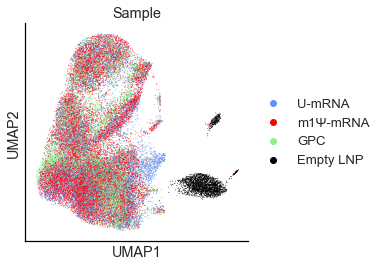

In [31]:
# sc.tl.leiden(concat_adata, random_state=42, resolution=0.8)
sc.pl.umap(concat_adata, color= ['Sample'], palette=colordict) # , save='_sample_allisotypes_23-03-03.svg')

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


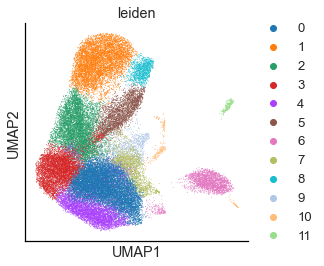

In [ ]:
sc.tl.leiden(concat_adata, random_state=42, resolution=0.5)
sc.pl.umap(concat_adata, color= 'leiden') # , save='_leiden_allisotypes_23-02-24.svg')

In [32]:
concat_adata.obs['Sample'].value_counts()

m1Ψ-mRNA     16017
U-mRNA       13637
GPC          10741
Empty LNP     2415
Name: Sample, dtype: int64

In [4]:
# concat_adata.write_h5ad('concat_adata.h5ad')

### FIgure S4A

In [33]:
pad = concat_adata[concat_adata.obs.Sample == 'm1Ψ-mRNA']
uad = concat_adata[concat_adata.obs.Sample == 'U-mRNA']

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


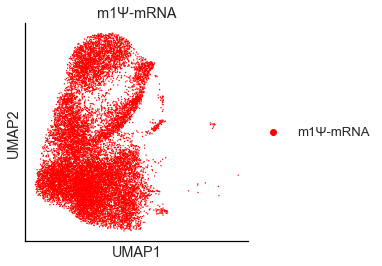

In [50]:
sc.pl.umap(pad, color= 'Sample', title= 'm1Ψ-mRNA', save='_mod_only.svg')

c:\Users\perry\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


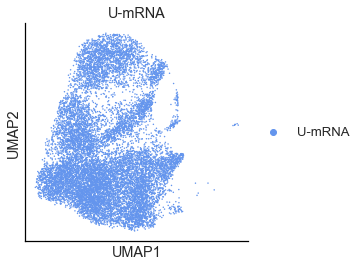

In [49]:
sc.pl.umap(uad, color= 'Sample', title= 'U-mRNA', save='_U_only.svg')